### **Univariate Linear Regression**

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
# from google.colab import files
# uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/4K_House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [24]:
y = data['Rent']
X = np.column_stack((data['Size'], data['Bathroom']))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
def gradient_descent(W, x, y):
    y_hat = x.dot(W).flatten()
    error = (y - y_hat)
    mse = (1.0 / len(x)) * np.sum(np.square(error))
    gradient = -(1.0 / len(x)) * error.dot(x)
    return gradient, mse

In [26]:
w = np.array((-40, -40))
alpha = .1
tolerance = 1e-3

old_w = []
errors = []

In [33]:
iterations = 1
for i in range(200):
    gradient, error = gradient_descent(w, X_scaled, y)
    new_w = w - alpha * gradient

    # Print error every 10 iterations
    if iterations % 10 == 0:
        print("Iteration: %d - Error: %.4f" % (iterations, error))
        old_w.append(new_w)
        errors.append(error)

    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print('Gradient Descent has converged')
        break

    iterations += 1
    w = new_w

print('w =', w)

Iteration: 10 - Error: 6034832509.3936
Iteration: 20 - Error: 6034832446.8111
Iteration: 30 - Error: 6034832409.8062
Iteration: 40 - Error: 6034832387.9252
Iteration: 50 - Error: 6034832374.9871
Iteration: 60 - Error: 6034832367.3368
Iteration: 70 - Error: 6034832362.8132
Iteration: 80 - Error: 6034832360.1384
Iteration: 90 - Error: 6034832358.5568
Iteration: 100 - Error: 6034832357.6216
Iteration: 110 - Error: 6034832357.0687
Iteration: 120 - Error: 6034832356.7417
Iteration: 130 - Error: 6034832356.5484
Iteration: 140 - Error: 6034832356.4340
Iteration: 150 - Error: 6034832356.3664
Iteration: 160 - Error: 6034832356.3265
Iteration: 170 - Error: 6034832356.3028
Iteration: 180 - Error: 6034832356.2889
Iteration: 190 - Error: 6034832356.2806
Iteration: 200 - Error: 6034832356.2757
w = [15008.87085078 23340.96226002]


In [34]:
w

array([15008.87085078, 23340.96226002])

In [42]:
all_ws = np.array(old_w)

# Just for visualization
errors.append(6000)
errors.append(5000)
errors.append(4000)
errors.append(3000)
errors.append(2250)

levels = np.sort(np.array(errors))

In [45]:
w0 = np.linspace(-w[0] * 5, w[0] * 5, 100)
w1 = np.linspace(-w[1] * 5, w[1] * 5, 100)
mse_vals = np.zeros(shape=(w0.size, w1.size))

In [46]:
for i, value1 in enumerate(w0):
    for j, value2 in enumerate(w1):
        w_temp = np.array((value1,value2))
        mse_vals[i, j] = gradient_descent(w_temp, X_scaled, y)[1]

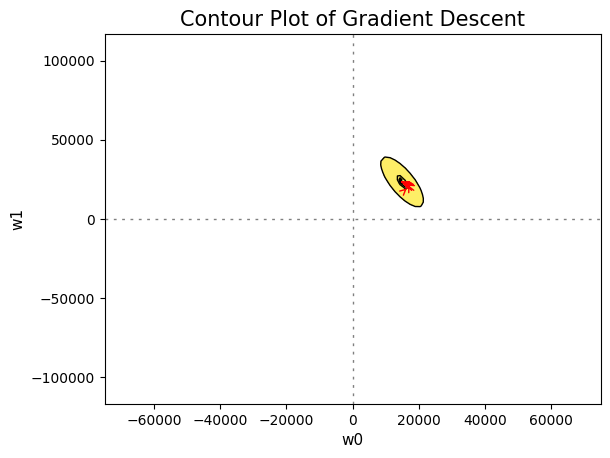

In [49]:
plt.contourf(w0, w1, mse_vals, levels=np.sort(np.array(errors)), alpha=.7)
plt.axhline(0, color='black', alpha=.5, dashes=[2, 4], linewidth=1)
plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4], linewidth=1)
for i in range(len(old_w) - 1):
    if i + 1 < len(all_ws):  # Check if the index is within bounds
        plt.annotate('', xy=all_ws[i + 1, :], xytext=all_ws[i, :],
                     arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                     va='center', ha='center')

# Sort the errors in increasing order
sorted_errors = np.sort(np.array(errors))
CS = plt.contour(w0, w1, mse_vals, levels=sorted_errors, linewidths=1, colors='black')
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Contour Plot of Gradient Descent", fontsize=15)
plt.xlabel("w0", fontsize=11)
plt.ylabel("w1", fontsize=11)
plt.show()


In [18]:
data.shape

(4746, 12)